In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy import datetime64
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
print(puidata)
url = 'https://data.cityofnewyork.us/api/views/hxm3-23vy/rows.csv?accessType=DOWNLOAD'
EDes = pd.read_csv(url)
EDes.head(7)


/nfshome/bl2621/PUIdata


,ENumber,E Effective Date,BOROCODE,TAXBLOCK,TAXLOT,HazMat Code,Air Code,Noise Code,HazMat Date,Air Date,Noise Date,CEQR_NUM,ULURP_NUM
0,E-1,04/28/1983,3,319,1,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
1,E-1,04/28/1983,3,319,10,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
2,E-1,04/28/1983,3,319,11,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
3,E-1,04/28/1983,3,319,12,0,0,1,NaN,NaN,05/31/2018,82-252K,830178 ZMK
4,E-1,04/28/1983,3,319,13,0,0,1,NaN,NaN,05/31/2018,82-252K,830178 ZMK
5,E-1,04/28/1983,3,319,14,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
6,E-1,04/28/1983,3,319,15,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK


In [5]:
EDes2 = EDes.drop(['ENumber','E Effective Date','BOROCODE','HazMat Code','Air Code','Noise Code','HazMat Date','Air Date','Noise Date','CEQR_NUM','ULURP_NUM'],axis=1)

In [6]:
EDes2.head(7)

,TAXBLOCK,TAXLOT
0,319,1
1,319,10
2,319,11
3,319,12
4,319,13
5,319,14
6,319,15


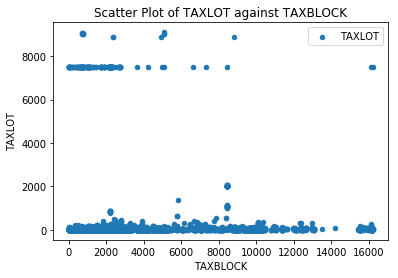

In [7]:
ax = EDes2.plot(x='TAXBLOCK',y='TAXLOT',kind='scatter',title='Scatter Plot of TAXLOT against TAXBLOCK')
ax.set_ylabel("TAXLOT")
ax.legend(['TAXLOT'])


       Fig 1: Scatter Plot of TAXLOT against TAXBLOCK

In [8]:
url2 = 'https://data.cityofnewyork.us/resource/b8cy-fje8.json'
EDjs = pd.read_json(url2)
EDjs.head(8)

,_0,_0_1,_1,_1_1,_3,_319,_4_28_1983_0_00,_82_252k,_830178_zmk,column_10,column_8,e_1
0,0,0,10,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
1,0,0,11,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
2,0,0,14,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
3,0,0,15,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
4,0,0,16,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
5,0,0,17,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
6,0,0,18,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
7,0,0,19,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1


In [9]:
EDjs = EDjs.drop(['_0','_0_1','_1_1','_3','_82_252k','_830178_zmk','column_10','column_8','e_1'],axis = 1)
EDjs.head(7)
#ax = EDes3.plot(x='E Effective Date',y='TAXLOT',kind='scatter',title='Scatter Plot of TAXLOT against E Effective Date')
#ax.set_ylabel("TAXLOT")
#ax.legend(['TAXLOT'])

,_1,_319,_4_28_1983_0_00
0,10,319,1983-04-28T00:00:00.000
1,11,319,1983-04-28T00:00:00.000
2,14,319,1983-04-28T00:00:00.000
3,15,319,1983-04-28T00:00:00.000
4,16,319,1983-04-28T00:00:00.000
5,17,319,1983-04-28T00:00:00.000
6,18,319,1983-04-28T00:00:00.000


## This json file has a wrong header, so I have to rename the header.

In [10]:
EDjs.rename(columns = {'_4_28_1983_0_00':'Date', 
               '_319':'TAXBLOCK', 
               '_1': 'TAXLOT'}, inplace=True)
EDjs["Date"] = EDjs["Date"].apply(lambda x: pd.Timestamp(x))
EDjs.head(7)

,TAXLOT,TAXBLOCK,Date
0,10,319,1983-04-28
1,11,319,1983-04-28
2,14,319,1983-04-28
3,15,319,1983-04-28
4,16,319,1983-04-28
5,17,319,1983-04-28
6,18,319,1983-04-28


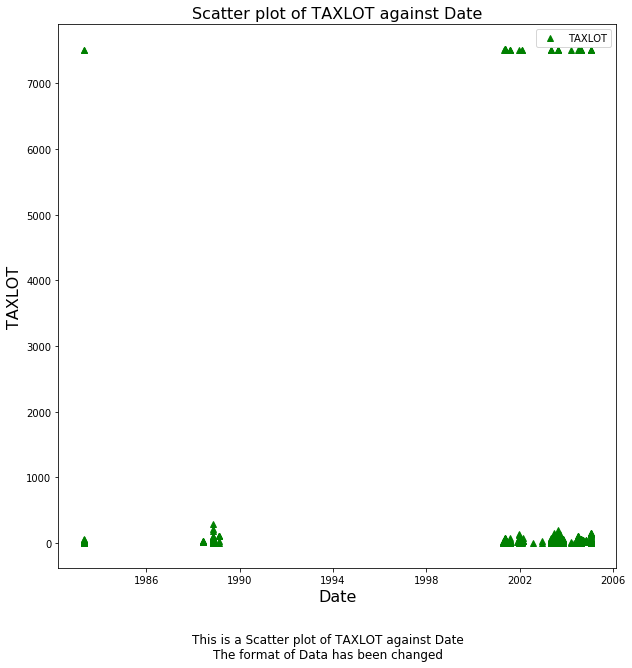

In [11]:
figure, ax = plt.subplots(figsize = (10,10))
ax.plot(EDjs.Date,EDjs.TAXLOT,'g^',label = 'TAXLOT')
ax.legend(loc='best')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('TAXLOT', fontsize = 16)
plt.title(r'Scatter plot of TAXLOT against Date', fontsize = 16)
plt.figtext(0.5, 0.0000001, 'This is a Scatter plot of TAXLOT against Date\nThe format of Data has been changed',horizontalalignment='center', fontsize=12)
plt.show()

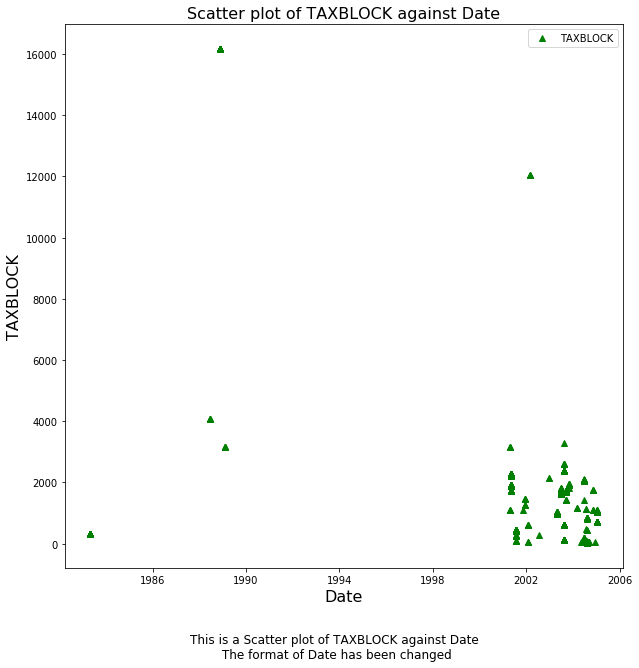

In [12]:
figure, ax = plt.subplots(figsize = (10,10))
ax.plot(EDjs.Date,EDjs.TAXBLOCK,'g^',label = 'TAXBLOCK')
ax.legend(loc='best')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('TAXBLOCK', fontsize = 16)
plt.title(r'Scatter plot of TAXBLOCK against Date', fontsize = 16)
plt.figtext(0.5, 0.0000001, 'This is a Scatter plot of TAXBLOCK against Date\n The format of Date has been changed',horizontalalignment='center', fontsize=12)
plt.show()